In [1]:
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pandas 라이브러리를 사용한 학습 데이터 불러오기

In [2]:
df = pd.read_csv('./data/train.csv',engine='python')
df.head()

,Date(MM/DD/YYYY),Hour,Solar Radiance(w/m^2),Temperature(C),Solar Power(kW)
0,1/1/2008,0,-2.8865,4.8469,0.0
1,1/1/2008,1,-2.9432,4.3895,0.0
2,1/1/2008,2,-3.3385,3.6565,0.0
3,1/1/2008,3,-3.1641,2.8669,0.0
4,1/1/2008,4,-3.0899,1.6784,0.0


### (추가) 센서의 noise 로 인해 Solar Radiance 열에 오류로서 음수값이 존재함, 따라서 음수를 0 으로 바꿔주는 전처리 작업이 필요함

### Date 열의 월/일/연도 Parsing

In [3]:
df_date = df['Date(MM/DD/YYYY)'].tolist()
month = list()
day = list()
year = list()

for date in df_date:
    a = date.split('/')
    month.append(a[0])
    day.append(a[1])
    year.append(a[2])

df.drop('Date(MM/DD/YYYY)', axis=1, inplace=True)
df.loc[:,'Month']=pd.Series(month, index=df.index)
df.loc[:,'Day']=pd.Series(day, index=df.index)
df.loc[:,'Year']=pd.Series(year, index=df.index)
df

,Hour,Solar Radiance(w/m^2),Temperature(C),Solar Power(kW),Month,Day,Year
0,0,-2.8865,4.8469,0.0,1,1,2008
1,1,-2.9432,4.3895,0.0,1,1,2008
2,2,-3.3385,3.6565,0.0,1,1,2008
3,3,-3.1641,2.8669,0.0,1,1,2008
4,4,-3.0899,1.6784,0.0,1,1,2008
...,...,...,...,...,...,...,...
105115,19,-1.5387,9.0635,0.0,12,31,2020
105116,20,-3.0244,8.5637,0.0,12,31,2020
105117,21,-2.5433,7.9824,0.0,12,31,2020
105118,22,-2.6706,7.7303,0.0,12,31,2020


### training data set 구성

In [4]:
column_names = ['Month','Day','Hour','Solar Radiance(w/m^2)','Temperature(C)','Solar Power(kW)']

split_idx = 87359
train = df.loc[:split_idx, column_names]
train

,Month,Day,Hour,Solar Radiance(w/m^2),Temperature(C),Solar Power(kW)
0,1,1,0,-2.8865,4.8469,0.0
1,1,1,1,-2.9432,4.3895,0.0
2,1,1,2,-3.3385,3.6565,0.0
3,1,1,3,-3.1641,2.8669,0.0
4,1,1,4,-3.0899,1.6784,0.0
...,...,...,...,...,...,...
87355,12,21,19,-3.2781,13.5015,0.0
87356,12,21,20,-3.1400,12.7927,0.0
87357,12,21,21,-2.5346,12.1585,0.0
87358,12,21,22,-2.0779,11.3312,0.0


### validation data set 구성

In [5]:
valid = df.loc[split_idx+1:split_idx+8904, column_names]
valid

,Month,Day,Hour,Solar Radiance(w/m^2),Temperature(C),Solar Power(kW)
87360,12,22,0,-1.6677,10.8532,0.0
87361,12,22,1,-2.0127,10.1513,0.0
87362,12,22,2,-1.8955,9.4143,0.0
87363,12,22,3,-2.5110,8.8195,0.0
87364,12,22,4,-2.7716,8.1052,0.0
...,...,...,...,...,...,...
96259,12,27,19,-2.5083,9.7293,0.0
96260,12,27,20,-2.5851,9.3510,0.0
96261,12,27,21,-2.6717,9.1775,0.0
96262,12,27,22,-2.8605,8.8868,0.0


### (추가) training data set 과 validation data set 에 대한 normalization 작업 수행 필요
* training data set 과 validation data set 의 비율은 자유롭게 조정 가능

### labeling 작업 수행
* 입력 데이터와 레이블에 대한 shift_hours 는 자유롭게 수정할 수 있다.

In [6]:
shift_hours = 24*7
sc = MinMaxScaler()

x_train = train[:-shift_hours]
y_train = train[shift_hours:]
y_train = y_train[['Solar Radiance(w/m^2)','Temperature(C)','Solar Power(kW)']]

x_valid = valid[:-shift_hours]
y_valid = valid[shift_hours:]
y_valid = y_valid[['Solar Radiance(w/m^2)','Temperature(C)','Solar Power(kW)']]

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_valid = x_valid.astype(float)
y_valid = y_valid.astype(float)

x_train = x_train.values
y_train = y_train.values
x_valid = x_valid.values
y_valid = y_valid.values

x_train = sc.fit_transform(x_train)
y_train = sc.fit_transform(y_train)
x_valid = sc.fit_transform(x_valid)
y_valid = sc.fit_transform(y_valid)

### 학습을 위한 dimension 조정

In [7]:
x_train = x_train.reshape(int(x_train.shape[0]/shift_hours), shift_hours, len(column_names))
y_train = y_train.reshape(int(y_train.shape[0]/shift_hours), shift_hours, 3)

x_valid = x_valid.reshape(int(x_valid.shape[0]/shift_hours), shift_hours, len(column_names))
y_valid = y_valid.reshape(int(y_valid.shape[0]/shift_hours), shift_hours, 3)

### 학습 데이터와 레이블의 비교 그래프

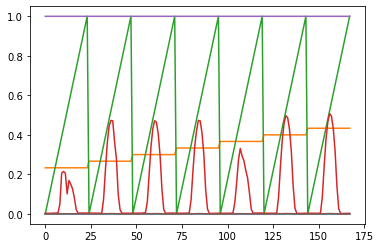

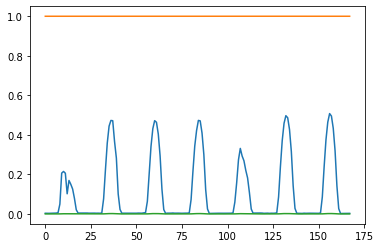

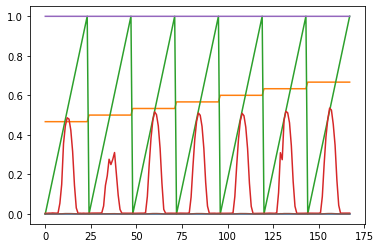

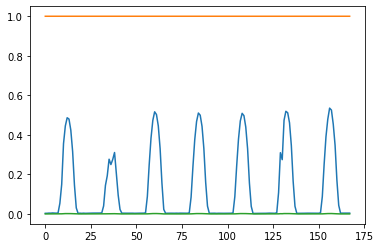

In [8]:
plt.figure(1)
plt.plot(x_train[1])

plt.figure(2)
plt.plot(y_train[0])

plt.figure(3)
plt.plot(x_train[2])

plt.figure(4)
plt.plot(y_train[1])

### LSTM 기반 학습 실행
* LSTM 외에도 다양한 Neural Network Model 적용 가능
* 하이퍼 파라미터 튜닝 필요

In [14]:
from tensorflow import keras
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import EarlyStopping
import keras.backend as K

K.clear_session()
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(shift_hours, len(column_names)), dropout=0.2, return_sequences=True))
model.add(Dense(3))
adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

model.summary()
early_stop = EarlyStopping(monitor='loss', patience=100, verbose=1)

hist = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=10, verbose=1, callbacks=[early_stop])
y_pred = model.predict(x_valid)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 168, 20)           2160      
                                                                 
 dense (Dense)               (None, 168, 3)            63        
                                                                 
Total params: 2,223
Trainable params: 2,223
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
52/52 [==============================] - 6s 102ms/step - loss: 0.2391 - accuracy: 0.5466 - val_loss: 0.1118 - val_accuracy: 0.7956
Epoch 2/10
52/52 [==============================] - 5s 103ms/step - loss: 0.0706 - accuracy: 0.9978 - val_loss: 0.2276 - val_accuracy: 0.7990
Epoch 3/10
52/52 [==============================] - 5s 104ms/step - loss: 0.0411 - accuracy: 0.9997 - val_loss: 0.1845 - val_accuracy: 0.7990
Epoch 4/10
52/52 [======

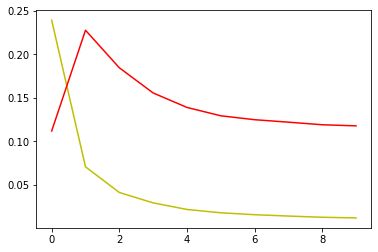

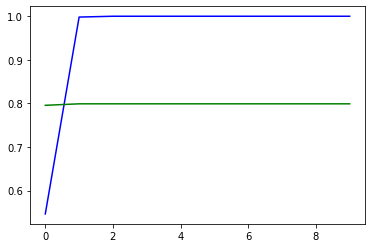

In [15]:
plt.figure(1)
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

plt.figure(2)
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')

### 측정값과 예측값을 그래프로 표시

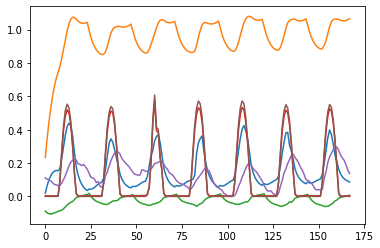

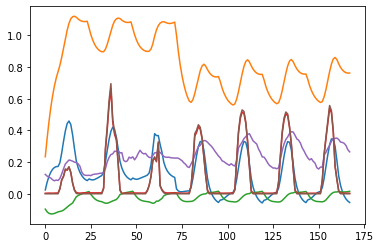

In [16]:
plt.figure(1)
plt.plot(y_pred[0])
plt.plot(y_valid[0])

plt.figure(2)
plt.plot(y_pred[1])
plt.plot(y_valid[1])

### submission 파일 제출하기

In [28]:
y_pred

array([[[ 1.92271993e-02,  2.32757673e-01, -8.81684422e-02],
        [ 6.41182736e-02,  3.45645875e-01, -9.88562927e-02],
        [ 9.88893807e-02,  4.45650518e-01, -1.04068086e-01],
        ...,
        [ 9.75966901e-02,  1.05494654e+00,  2.25622952e-03],
        [ 9.15305167e-02,  1.05945396e+00,  4.55132127e-03],
        [ 8.68627653e-02,  1.06628191e+00,  6.80152327e-03]],

       [[ 2.44539231e-02,  2.33754873e-01, -9.71106738e-02],
        [ 7.25665167e-02,  3.49312514e-01, -1.14039660e-01],
        [ 1.09290451e-01,  4.53109503e-01, -1.23424068e-01],
        ...,
        [-3.31123695e-02,  7.64255166e-01,  1.20407715e-02],
        [-4.60081398e-02,  7.61385143e-01,  1.33720338e-02],
        [-5.50141186e-02,  7.62219608e-01,  1.54971033e-02]],

       [[ 4.56818566e-03,  1.77967280e-01, -7.91716948e-02],
        [ 3.54109108e-02,  2.39955306e-01, -8.07953849e-02],
        [ 5.54208532e-02,  2.95169592e-01, -7.85245448e-02],
        ...,
        [-2.27782317e-02,  7.98353195e-01,

In [27]:
y_trans = y_pred.reshape(-1,3)
sc.inverse_transform(y_trans)

array([[ 14.516024  ,  10.117694  , -24.12077   ],
       [ 62.992195  ,  15.019424  , -27.044708  ],
       [100.54019   ,  19.361736  , -28.47053   ],
       ...,
       [ 47.502693  ,  44.134438  ,   0.26048657],
       [ 39.84432   ,  44.32869   ,   0.89659107],
       [ 34.44255   ,  44.623634  ,   1.5500048 ]], dtype=float32)

In [12]:
# submission_df = pd.read_csv('/kaggle/input/jbnu-bigdata-seq/sample_submission.csv',engine='python')
# submission_df.head()

### (최종) 'sample_submission.csv' 파일의 구조를 참고할것
### 'test (2020).csv' 의 구간(2월~12월 첫째주, 총77일(1,848시간))에 대해 Solar Radiance, Temperature, Solar Power 값을 예측 후 ID, Month, Day, Hour 와 함께 기입하여, 'submission.csv' 로 제출

In [13]:
# submission_df.to_csv('/kaggle/working/submission.csv', index=False)